In [1]:
NAME="ANDREW BONAFEDE"

# Train CQL:
- Pick (any) one environment/dataset in d3rlpy
(https://github.com/takuseno/d3rlpy).
- Train your CQL agent with the data from the behavior policy.
- Generate true Q vs training steps (may include different
dataset sizes, task difficulties) plots.
- Generate estimated Q vs training steps (may include
different dataset sizes, task difficulties) plots.

# My Approach

Use the Initial State Value Estimation Scorer to retrieve our Estimated Q Values from the outputs of the Q-Network.

Use Evaluate on Environment to get our True-Q Values from our policy.

In [ ]:
# Import d3rlpy
!pip install d3rlpy

In [3]:
# All other necessary imports
from d3rlpy.algos.cql import DiscreteCQL
from d3rlpy.metrics.scorer import initial_state_value_estimation_scorer, evaluate_on_environment
from d3rlpy.datasets import get_cartpole
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import shutil

In [4]:
# Clear Logs
shutil.rmtree('/content/d3rlpy_logs', ignore_errors=True)

# Using Cartpole (my favorite)

In [ ]:
# Get Cartpole Dataset and Environment
dataset, env = get_cartpole()

# Split into training episodes and testing episodes
train_episodes, eval_episodes = train_test_split(dataset,test_size=0.2,random_state=0)

# Instantiate our CQL
cql = DiscreteCQL()

# Fit our CQL to get our Estimated Q Values by getting the output of our Q-Network
# Get our True Q Values by using Evaluate on Environment which only uses our Policy
result = cql.fit(
   train_episodes,
   eval_episodes = eval_episodes,
   n_epochs=20,
   scorers={
       "estimated_q": initial_state_value_estimation_scorer,
       "true_q": evaluate_on_environment(env)},
   experiment_name="hw3cartpole")

# Plot the Results

Text(0, 0.5, 'Estimated Q Value')

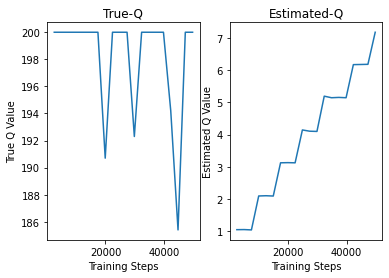

In [17]:
true_q = pd.read_csv("/content/d3rlpy_logs/hw3cartpole_20230323231244/true_q.csv",names=['Index','Step','Value'])
estimated_q = pd.read_csv("/content/d3rlpy_logs/hw3cartpole_20230323231244/estimated_q.csv",names=['Index','Step','Value'])

plt.subplot(1,2,1)
plt.plot(true_q['Step'],true_q['Value'])
plt.title('True-Q')
plt.xlabel("Training Steps")
plt.ylabel("True Q Value")

plt.subplot(1,2,2)
plt.plot(estimated_q['Step'],estimated_q['Value'])
plt.title('Estimated-Q')
plt.xlabel("Training Steps")
plt.ylabel("Estimated Q Value")

